# Authentication Charts Generator

This notebook contains code to generate individual charts for the authentication study results.

In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import numpy as np

soft_colors = {
    'blue': '#a6cee3',      
    'orange': '#fdbf6f',    
    'green': '#b2df8a',     
    'red': '#fb9a99',       
    'purple': '#cab2d6',    
    'teal': '#6a3d9a',     
    'skyblue': '#ccebc5',   
    'pink': '#ffed6f',      
    'gray': '#e6e6e6'       
}

alpha_value = 0.7

In [2]:

def parse_txt_file(file_path):
    """Parse a single result txt file and extract the data."""
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read()
    
    result_data = {}
    
    auth_type_match = re.search(r'=== (.*?) AUTHENTICATION RESULTS ===', content)
    if auth_type_match:
        result_data['auth_type'] = auth_type_match.group(1)
    
    user_id_match = re.search(r'User ID: (.*?)$', content, re.MULTILINE)
    if user_id_match:
        result_data['user_id'] = user_id_match.group(1).strip()
    
    result_match = re.search(r'Result: (.*?)$', content, re.MULTILINE)
    if result_match:
        result_data['success'] = 'Successful' in result_match.group(1)
    
    time_match = re.search(r'Total Authentication Time: ([\d.]+)', content)
    if time_match:
        result_data['auth_time'] = float(time_match.group(1))
    
    if result_data.get('auth_type') == 'MUSIC':

        rounds_match = re.search(r'Rounds Played: (\d+)', content)
        if rounds_match:
            result_data['rounds_played'] = int(rounds_match.group(1))
        
        consecutive_match = re.search(r'Required Consecutive Correct: (\d+)', content)
        if consecutive_match:
            result_data['required_consecutive'] = int(consecutive_match.group(1))
        
        achieved_match = re.search(r'Achieved Consecutive Correct: (\d+)', content)
        if achieved_match:
            result_data['achieved_consecutive'] = int(achieved_match.group(1))
        
        attempts_match = re.search(r'Total Attempts: (\d+)', content)
        if attempts_match:
            result_data['total_attempts'] = int(attempts_match.group(1))
        
        avg_attempts_match = re.search(r'Average Attempts per Round: ([\d.]+)', content)
        if avg_attempts_match:
            result_data['avg_attempts'] = float(avg_attempts_match.group(1))
        
        segment_duration_match = re.search(r'Segment Duration: (\d+)', content)
        if segment_duration_match:
            result_data['segment_duration'] = int(segment_duration_match.group(1))
    
    elif result_data.get('auth_type') == 'PASSWORD':

        attempts_match = re.search(r'Attempts: (\d+)', content)
        if attempts_match:
            result_data['attempts'] = int(attempts_match.group(1))
        
        password_length_match = re.search(r'Password Length: (\d+)', content)
        if password_length_match:
            result_data['password_length'] = int(password_length_match.group(1))
    
    feedback_section = re.search(r'=== USER FEEDBACK ===\n(.*?)(?:\n\n|$)', content, re.DOTALL)
    if feedback_section:
        feedback_text = feedback_section.group(1)
        
        for line in feedback_text.split('\n'):
            if ':' in line:
                key, value = line.split(':', 1)
                key = key.strip().lower().replace(' ', '_')
                value = value.strip()
                
                try:
                    if value.isdigit():
                        value = int(value)
                    elif re.match(r'^[\d.]+$', value):
                        value = float(value)
                except:
                    pass
                
                result_data[key] = value
    
    return result_data

In [3]:
def load_all_data():

    current_dir = os.path.dirname(os.path.abspath("__file__"))
    txt_files = [f for f in os.listdir(current_dir) if f.endswith('.txt') and f != 'authentication_analysis_report.txt']
    
    if not txt_files:
        print("No .txt files found in the current directory.")
        return None, None, None
    
    print(f"Found {len(txt_files)} result files to analyze.")
    
    all_results = []
    for txt_file in txt_files:
        file_path = os.path.join(current_dir, txt_file)
        try:
            result_data = parse_txt_file(file_path)
            all_results.append(result_data)
            print(f"Successfully parsed {txt_file}")
        except Exception as e:
            print(f"Error parsing {txt_file}: {str(e)}")
    
    if not all_results:
        print("No results could be parsed successfully.")
        return None, None, None
    
    results_df = pd.DataFrame(all_results)
    
    music_results = results_df[results_df['auth_type'] == 'MUSIC']
    password_results = results_df[results_df['auth_type'] == 'PASSWORD']
    
    return results_df, music_results, password_results


os.makedirs('charts', exist_ok=True)


all_results, music_results, password_results = load_all_data()

Found 60 result files to analyze.
Successfully parsed 年轻5.txt
Successfully parsed 1.txt
Successfully parsed 10.txt
Successfully parsed 11.txt
Successfully parsed 12.txt
Successfully parsed 13.txt
Successfully parsed 14.txt
Successfully parsed 15.txt
Successfully parsed 16.txt
Successfully parsed 17.txt
Successfully parsed 18.txt
Successfully parsed 19.txt
Successfully parsed 2.txt
Successfully parsed 20.txt
Successfully parsed 3.txt
Successfully parsed 4.txt
Successfully parsed 5.txt
Successfully parsed 6.txt
Successfully parsed 7.txt
Successfully parsed 8.txt
Successfully parsed 9.txt
Successfully parsed 年轻5pass.txt
Successfully parsed 年轻6.txt
Successfully parsed 年轻6pass.txt
Successfully parsed 年轻7.txt
Successfully parsed 年轻7pass.txt
Successfully parsed 年轻8.txt
Successfully parsed 年轻8pass.txt
Successfully parsed 年轻9.txt
Successfully parsed 年轻9pass.txt
Successfully parsed 年轻pass.txt
Successfully parsed 老笨.txt
Successfully parsed 老笨1.txt
Successfully parsed 老笨1pass.txt
Successfully pars

## Chart 1: Comparison of authentication success rate and time

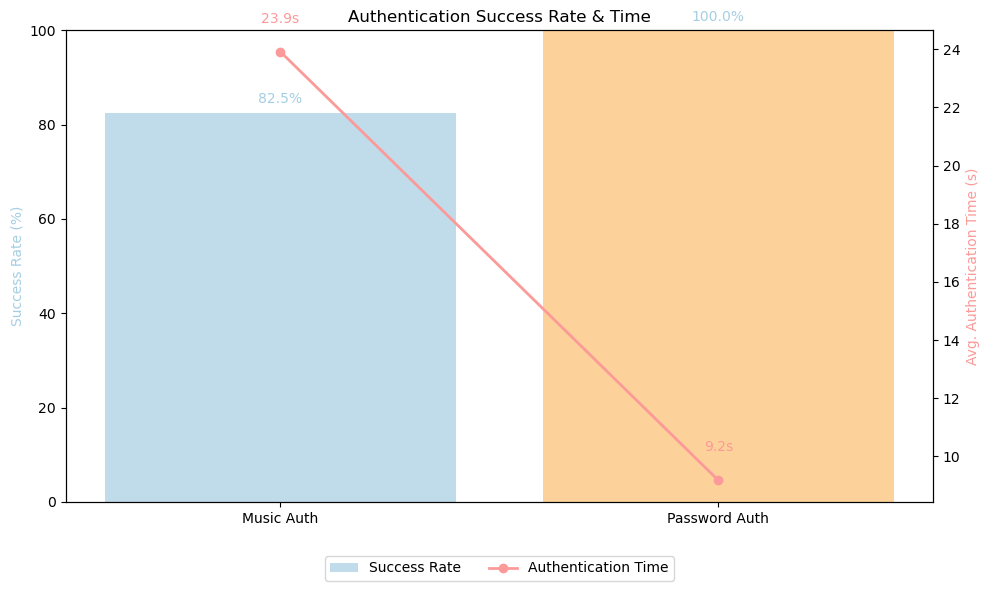

In [4]:
plt.figure(figsize=(10, 6))

if not music_results.empty and not password_results.empty:
    labels = ['Music Auth', 'Password Auth']
    success_rates = [
        music_results['success'].mean() * 100,
        password_results['success'].mean() * 100
    ]
    
    bars = plt.bar(labels, success_rates, color=[soft_colors['blue'], soft_colors['orange']], alpha=0.7)
    plt.ylabel('Success Rate (%)', color=soft_colors['blue'])
    plt.ylim(0, 100)
    
    for i, bar in enumerate(bars):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
                f'{success_rates[i]:.1f}%', ha='center', color=soft_colors['blue'])
    
    ax_twin = plt.twinx()
    auth_times = [
        music_results['auth_time'].mean(),
        password_results['auth_time'].mean()
    ]
    
    ax_twin.plot(labels, auth_times, 'o-', color=soft_colors['red'], linewidth=2, label='Auth Time')
    ax_twin.set_ylabel('Avg. Authentication Time (s)', color=soft_colors['red'])
    
    for i, time in enumerate(auth_times):
        ax_twin.text(i, time + 1, f'{time:.1f}s', ha='center', color=soft_colors['red'])
    
    bars_legend = plt.Rectangle((0, 0), 1, 1, fc=soft_colors['blue'], alpha=0.7)
    line_legend = plt.Line2D([0], [0], color=soft_colors['red'], linewidth=2, marker='o')
    plt.legend([bars_legend, line_legend], ['Success Rate', 'Authentication Time'], 
              loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
    
elif not music_results.empty:
    success_rate = music_results['success'].mean() * 100
    auth_time = music_results['auth_time'].mean()
    
    plt.bar(['Music Auth'], [success_rate], color=soft_colors['blue'], alpha=0.7, label='Success Rate')
    plt.ylabel('Success Rate (%)', color=soft_colors['blue'])
    plt.ylim(0, 100)
    plt.text(0, success_rate + 2, f'{success_rate:.1f}%', ha='center', color=soft_colors['blue'])
    
    ax_twin = plt.twinx()
    ax_twin.plot(['Music Auth'], [auth_time], 'o', color=soft_colors['red'], markersize=10, label='Auth Time')
    ax_twin.set_ylabel('Avg. Authentication Time (s)', color=soft_colors['red'])
    ax_twin.text(0, auth_time + 1, f'{auth_time:.1f}s', ha='center', color=soft_colors['red'])
    
    bars_legend = plt.Rectangle((0, 0), 1, 1, fc=soft_colors['blue'], alpha=0.7)
    line_legend = plt.Line2D([0], [0], color=soft_colors['red'], linewidth=2, marker='o')
    plt.legend([bars_legend, line_legend], ['Success Rate', 'Authentication Time'], 
              loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
else:
    plt.text(0.5, 0.5, 'No authentication data available', 
            ha='center', va='center', fontsize=12)
    plt.axis('off')

plt.title('Authentication Success Rate & Time')
plt.tight_layout()
plt.savefig('charts/auth_success_time.png')
plt.show()

## Chart 2: Comparison of audio clip lengths

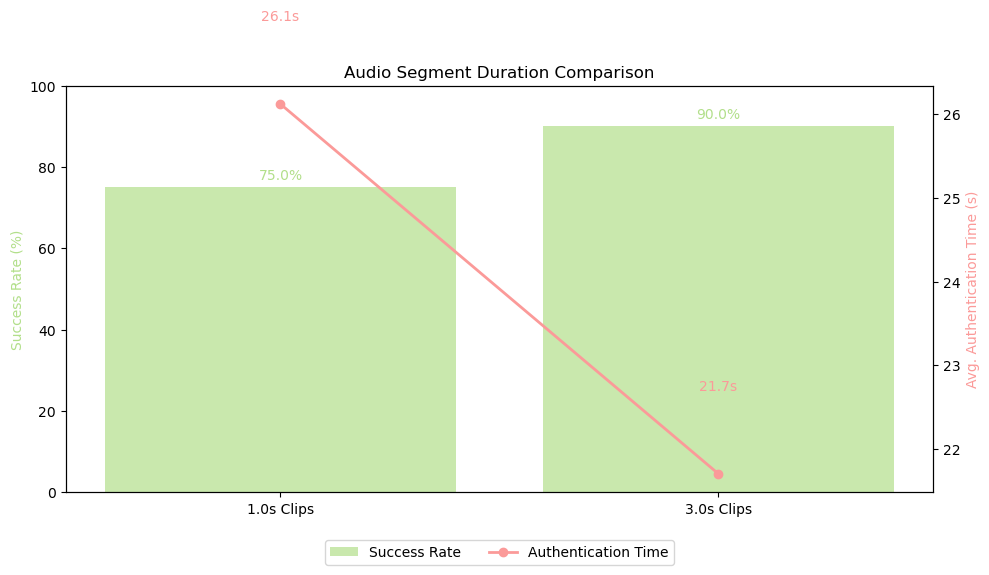

In [5]:
plt.figure(figsize=(10, 6))

if not music_results.empty and 'segment_duration' in music_results.columns and len(music_results['segment_duration'].unique()) > 1:
    segment_stats = music_results.groupby('segment_duration').agg({
        'success': 'mean',
        'auth_time': 'mean'
    })
    
    segment_labels = [f"{dur}s Clips" for dur in segment_stats.index]
    success_rates = segment_stats['success'] * 100
    
    bars = plt.bar(segment_labels, success_rates, color=soft_colors['green'], alpha=0.7, label='Success Rate')
    plt.ylabel('Success Rate (%)', color=soft_colors['green'])
    plt.ylim(0, 100)
    
    for i, bar in enumerate(bars):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
                f'{success_rates.iloc[i]:.1f}%', ha='center', color=soft_colors['green'])
    
    ax_twin = plt.twinx()
    auth_times = segment_stats['auth_time']
    
    ax_twin.plot(segment_labels, auth_times, 'o-', color=soft_colors['red'], linewidth=2, label='Auth Time')
    ax_twin.set_ylabel('Avg. Authentication Time (s)', color=soft_colors['red'])
    
    for i, time in enumerate(auth_times):
        ax_twin.text(i, time + 1, f'{time:.1f}s', ha='center', color=soft_colors['red'])
    
    bars_legend = plt.Rectangle((0, 0), 1, 1, fc=soft_colors['green'], alpha=0.7)
    line_legend = plt.Line2D([0], [0], color=soft_colors['red'], linewidth=2, marker='o')
    plt.legend([bars_legend, line_legend], ['Success Rate', 'Authentication Time'], 
              loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
    
    plt.title('Audio Segment Duration Comparison')
else:
    plt.text(0.5, 0.5, 'No segment duration comparison data available', 
            ha='center', va='center', fontsize=12)
    plt.title('Audio Segment Duration Comparison')
    plt.axis('off')

plt.tight_layout()
plt.savefig('charts/audio_duration_comparison.png')
plt.show()

## Chart 3: Safety Assessment

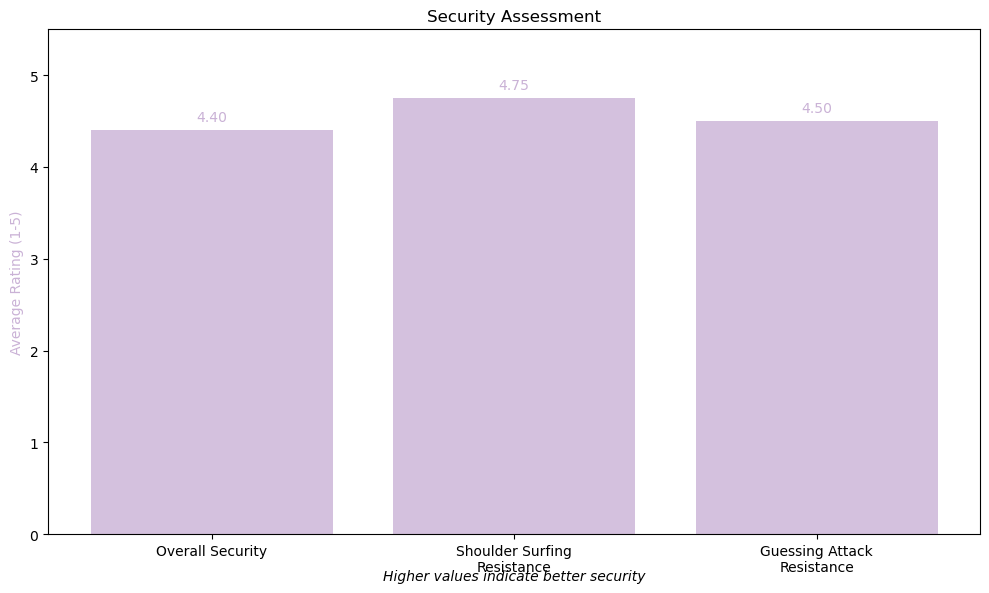

In [6]:
plt.figure(figsize=(10, 6))

security_metrics = ['security_rating', 'shoulder_surfing_rating', 'guessing_rating']
security_labels = ['Overall Security', 'Shoulder Surfing\nResistance', 'Guessing Attack\nResistance']
security_data = []

for metric in security_metrics:
    if metric in all_results.columns:
        security_data.append(all_results[metric].mean())
    else:
        security_data.append(0) 

if any(security_data):
    bars = plt.bar(security_labels, security_data, color=soft_colors['purple'], alpha=0.8)
    plt.ylim(0, 5.5) 
    plt.ylabel('Average Rating (1-5)', color=soft_colors['purple'])
    
    for i, bar in enumerate(bars):
        if security_data[i] > 0: 
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                    f'{security_data[i]:.2f}', ha='center', color=soft_colors['purple'])
    
    plt.title('Security Assessment')
    plt.text(1, -0.5, 'Higher values indicate better security', ha='center', fontsize=10, style='italic')
    
else:
    plt.text(0.5, 0.5, 'No security assessment data available', 
            ha='center', va='center', fontsize=12)
    plt.title('Security Assessment')
    plt.axis('off')

plt.tight_layout()
plt.savefig('charts/security_assessment.png')
plt.show()

## Chart 4: Environmental adaptability

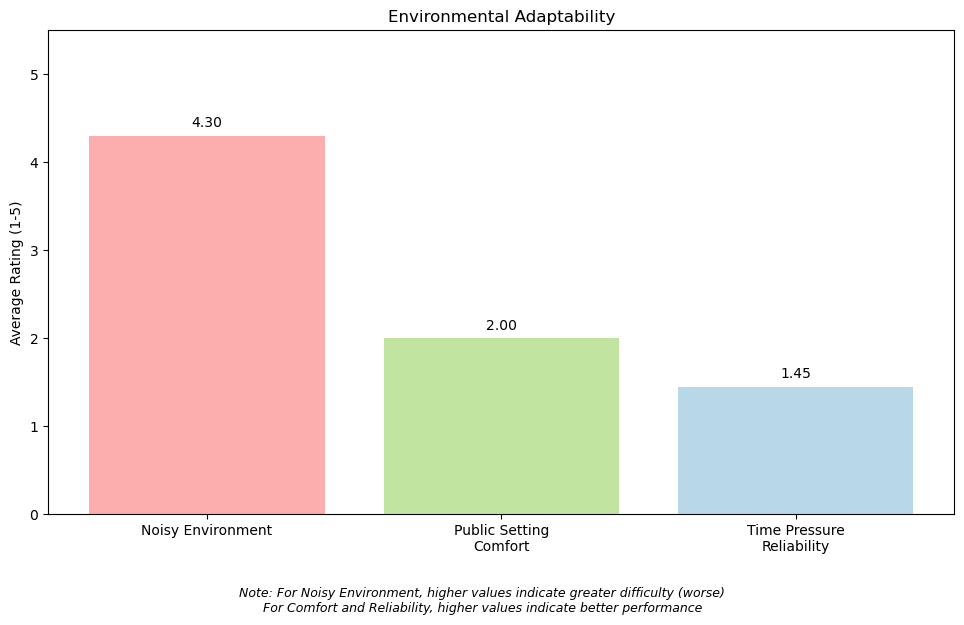

In [7]:
plt.figure(figsize=(10, 6))

env_metrics = ['noisy_difficulty', 'public_comfort', 'emergency_reliability']
env_labels = ['Noisy Environment', 'Public Setting\nComfort', 'Time Pressure\nReliability']
env_data = []
raw_values = []

for metric in env_metrics:
    if metric in all_results.columns:
        raw_value = all_results[metric].mean()
        raw_values.append(raw_value)
        

        if 'difficulty' in metric:
            display_value = 6 - raw_value  
            env_data.append(display_value)
        else:
            env_data.append(raw_value)
    else:
        env_data.append(0)
        raw_values.append(0)

if any(env_data):  
    colors = [soft_colors['red'], soft_colors['green'], soft_colors['blue']]
    
    bars = plt.bar(env_labels, raw_values, color=colors, alpha=0.8)
    plt.ylim(0, 5.5)
    plt.ylabel('Average Rating (1-5)')
    
    for i, bar in enumerate(bars):
        if raw_values[i] > 0: 
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                    f'{raw_values[i]:.2f}', ha='center')
    
    plt.title('Environmental Adaptability')
    

    plt.figtext(0.5, -0.05, 
           'Note: For Noisy Environment, higher values indicate greater difficulty (worse)\n'
           'For Comfort and Reliability, higher values indicate better performance', 
           ha='center', fontsize=9, style='italic')
        
else:
    plt.text(0.5, 0.5, 'No environmental adaptability data available', 
            ha='center', va='center', fontsize=12)
    plt.title('Environmental Adaptability')
    plt.axis('off')

plt.tight_layout(pad=2.0) 
plt.savefig('charts/environmental_adaptability.png')
plt.show()

## Chart 5: User experience evaluation

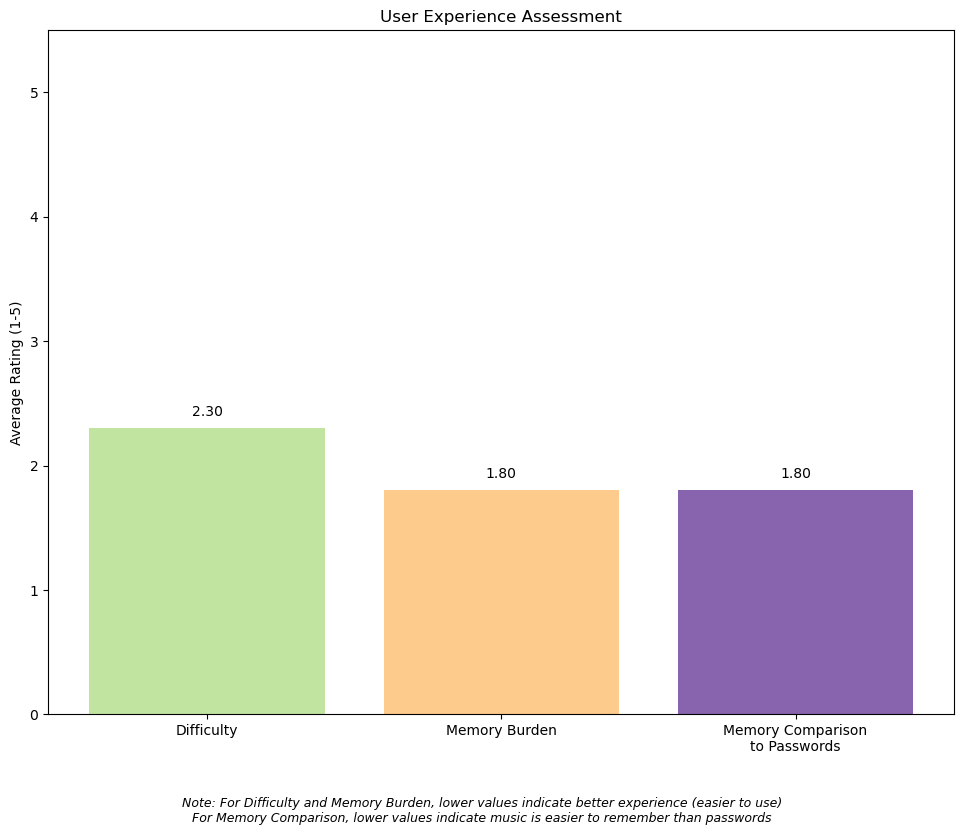

In [8]:
plt.figure(figsize=(10, 8))

ux_metrics = ['difficulty_rating', 'memory_burden_rating', 'memory_comparison']
ux_labels = ['Difficulty', 'Memory Burden', 'Memory Comparison\nto Passwords']
ux_data = []
raw_values = []

for metric in ux_metrics:
    if metric in all_results.columns:
        raw_value = all_results[metric].mean()
        raw_values.append(raw_value)
        ux_data.append(raw_value) 
    else:
        ux_data.append(0)
        raw_values.append(0)

if any(ux_data):  
    colors = [soft_colors['green'], soft_colors['orange'], soft_colors['teal']]
    bars = plt.bar(ux_labels, ux_data, color=colors, alpha=0.8)
    plt.ylim(0, 5.5)
    plt.ylabel('Average Rating (1-5)')
    
    for i, bar in enumerate(bars):
        if ux_data[i] > 0:
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                    f'{ux_data[i]:.2f}', ha='center')
    
    plt.title('User Experience Assessment')
    
    plt.figtext(0.5, -0.05, 
               'Note: For Difficulty and Memory Burden, lower values indicate better experience (easier to use)\n'
               'For Memory Comparison, lower values indicate music is easier to remember than passwords', 
               ha='center', fontsize=9, style='italic')
else:
    plt.text(0.5, 0.5, 'No user experience data available', 
            ha='center', va='center', fontsize=12)
    plt.title('User Experience Assessment')
    plt.axis('off')

plt.tight_layout(pad=2.0)
plt.savefig('charts/user_experience.png')
plt.show()

## Chart 6: User authentication preference pie chart

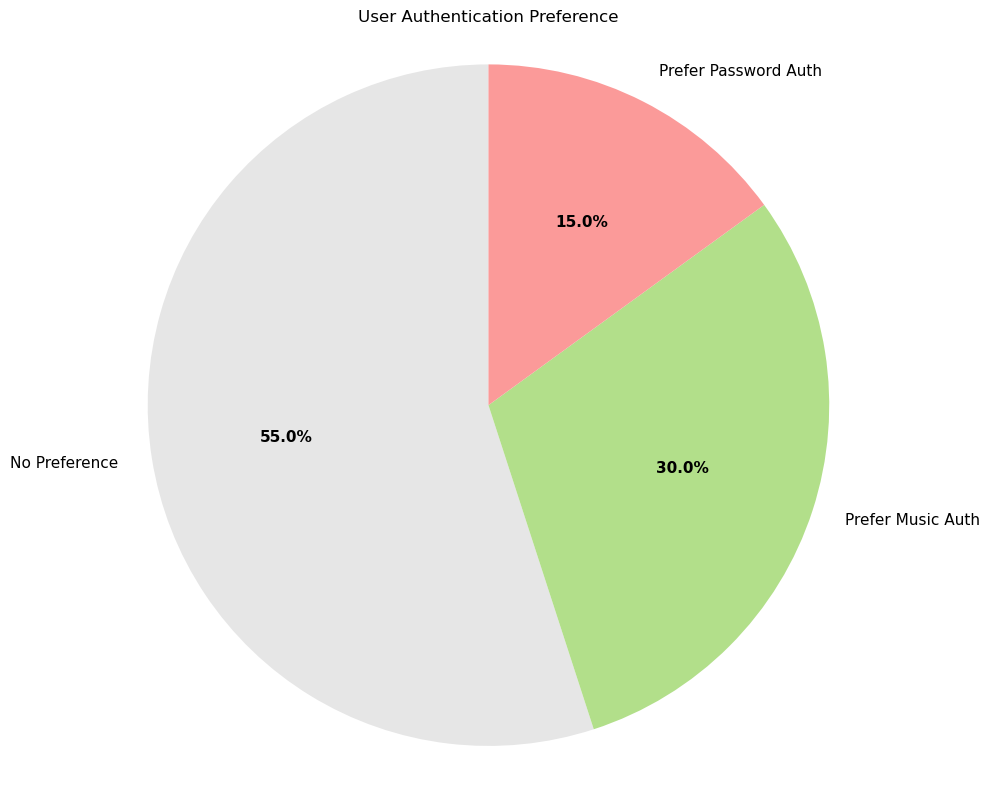

In [9]:
plt.figure(figsize=(10, 8))  

if 'preference' in all_results.columns:
    preference_counts = all_results['preference'].value_counts()
    
    labels = []
    sizes = []
    colors = []
    
    color_map = {
        'music': soft_colors['green'],
        'password': soft_colors['red'],
        'same': soft_colors['gray']
    }
    
    label_map = {
        'music': 'Prefer Music Auth',
        'password': 'Prefer Password Auth',
        'same': 'No Preference'
    }
    
    for category in preference_counts.index:
        labels.append(label_map.get(category, category))
        sizes.append(preference_counts[category])
        colors.append(color_map.get(category, soft_colors['blue']))
    
    wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors, 
                                      autopct='%1.1f%%', startangle=90, 
                                      textprops={'fontsize': 11})
    
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontweight('bold')
    
    plt.title('User Authentication Preference')
    plt.axis('equal') 
else:
    plt.text(0.5, 0.5, 'No preference data available', 
            ha='center', va='center', fontsize=12)
    plt.title('User Authentication Preference')
    plt.axis('off')

plt.tight_layout()
plt.savefig('charts/user_preference.png')
plt.show()

## Chart 7: Comparison of speed and fun

<Figure size 1200x800 with 0 Axes>

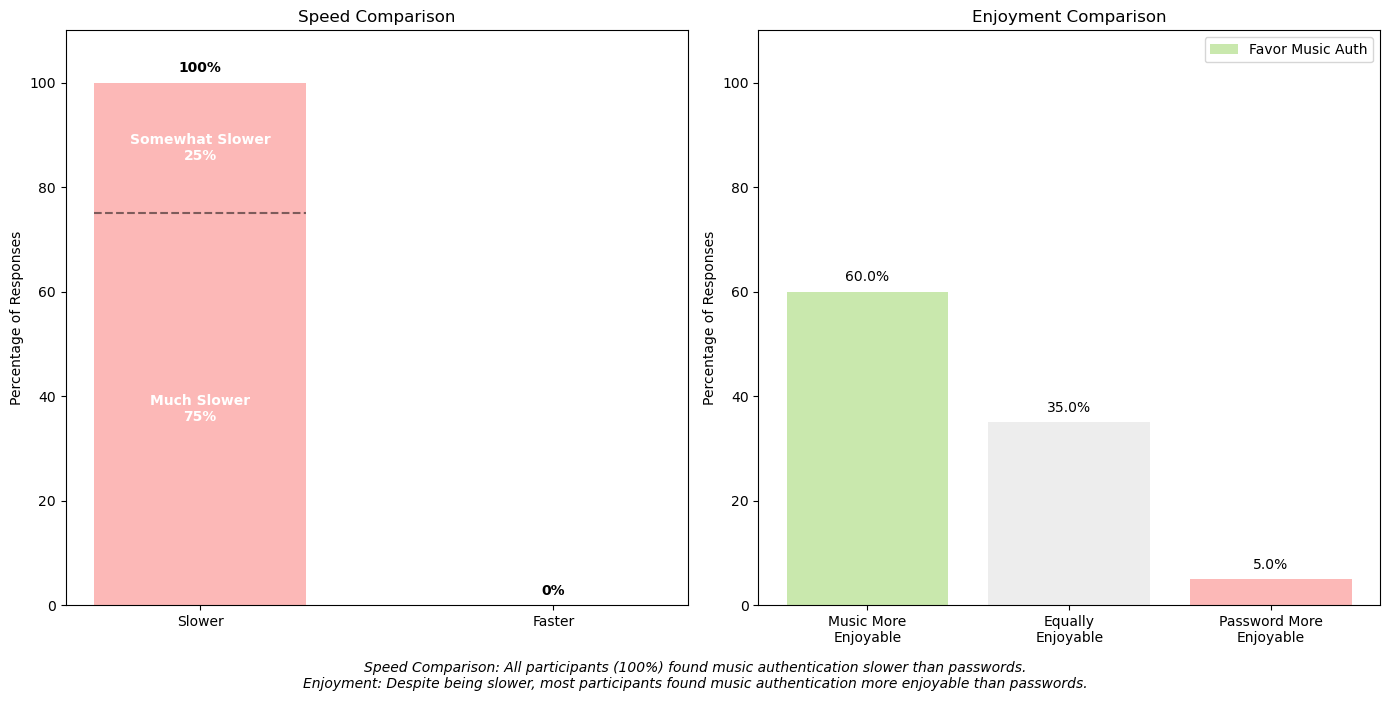

In [10]:
plt.figure(figsize=(12, 8))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))


categories = ['Slower', 'Faster']
values = [100, 0] 

bars = ax1.bar(categories, values, width=0.6, color=[soft_colors['red'], soft_colors['green']], alpha=0.7)

for i, bar in enumerate(bars):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
            f"{values[i]}%", ha='center', fontsize=10, fontweight='bold')

slow_breakdown = {'Much Slower': 75, 'Somewhat Slower': 25}
bar_height = 100  
bar_width = bars[0].get_width()
bar_x = bars[0].get_x()

divider_height = slow_breakdown['Much Slower']
ax1.plot([bar_x, bar_x + bar_width], [divider_height, divider_height], 
         'k--', alpha=0.5)  

ax1.text(bar_x + bar_width/2, divider_height/2, 
         f"Much Slower\n{slow_breakdown['Much Slower']}%", 
         ha='center', va='center', color='white', fontweight='bold')
ax1.text(bar_x + bar_width/2, divider_height + (bar_height - divider_height)/2, 
         f"Somewhat Slower\n{slow_breakdown['Somewhat Slower']}%", 
         ha='center', va='center', color='white', fontweight='bold')

ax1.set_ylabel('Percentage of Responses')
ax1.set_ylim(0, 110)
ax1.set_title('Speed Comparison')


if 'enjoyment' in all_results.columns:
    enjoyment_counts = all_results['enjoyment'].value_counts()
    total = enjoyment_counts.sum()
    percentages = (enjoyment_counts / total) * 100
    
    categories = []
    values = []
    colors = []
    
    for category in ['music', 'same', 'password']:
        if category in enjoyment_counts.index:
            categories.append(category)
            values.append(percentages[category])
            
            if category == 'music':
                colors.append(soft_colors['green'])
            elif category == 'password':
                colors.append(soft_colors['red'])
            else: 
                colors.append(soft_colors['gray'])
    
    labels = []
    for cat in categories:
        if cat == 'music':
            labels.append('Music More\nEnjoyable')
        elif cat == 'password':
            labels.append('Password More\nEnjoyable')
        else: 
            labels.append('Equally\nEnjoyable')
    
    bars = ax2.bar(labels, values, color=colors, alpha=0.7)
    
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, height + 2,
                f'{height:.1f}%', ha='center', fontsize=10)
    
    ax2.set_ylabel('Percentage of Responses')
    ax2.set_ylim(0, 110)  
    ax2.set_title('Enjoyment Comparison')
    
    ax2.legend(['Favor Music Auth', 'No Preference', 'Favor Password Auth'], 
              loc='upper right')

fig.text(0.5, 0.01, 
        'Speed Comparison: All participants (100%) found music authentication slower than passwords.\n'
        'Enjoyment: Despite being slower, most participants found music authentication more enjoyable than passwords.',
        ha='center', fontsize=10, style='italic')

plt.tight_layout(rect=[0, 0.05, 1, 1])  
plt.savefig('charts/speed_enjoyment_comparison.png')
plt.show()

## Chart 8: Applicable scenario analysis

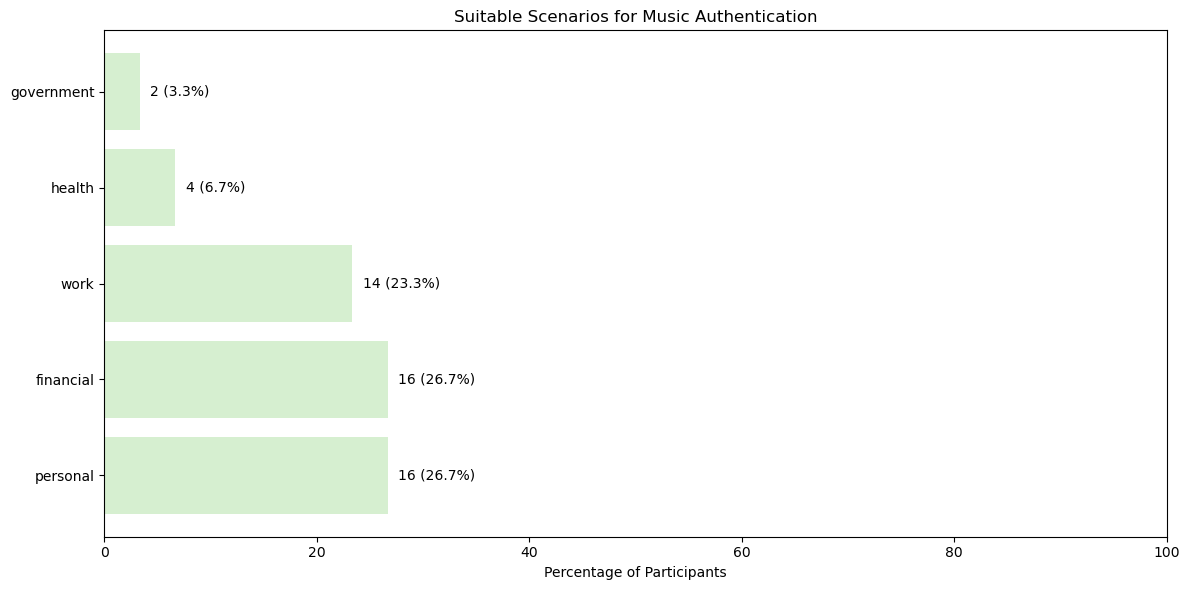

In [11]:
plt.figure(figsize=(12, 6))

if 'suitable_scenarios' in all_results.columns:
    all_scenarios = []
    for scenarios in all_results['suitable_scenarios'].dropna():
        if isinstance(scenarios, str):
            all_scenarios.extend([s.strip() for s in scenarios.split(',')])
    
    scenario_counts = Counter(all_scenarios)
    
    if scenario_counts:
        scenarios = []
        counts = []
        
        for scenario, count in scenario_counts.most_common():
            scenarios.append(scenario)
            counts.append(count)
        
        total_responses = len(all_results)
        percentages = [count/total_responses*100 for count in counts]
        
        bars = plt.barh(scenarios, percentages, color=soft_colors['skyblue'], alpha=0.8)
        
        for i, (bar, count) in enumerate(zip(bars, counts)):
            plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
                    f'{count} ({percentages[i]:.1f}%)', va='center')
        
        plt.xlabel('Percentage of Participants')
        plt.title('Suitable Scenarios for Music Authentication')
        plt.xlim(0, 100)
    else:
        plt.text(0.5, 0.5, 'No scenario data available', 
                ha='center', va='center', fontsize=12)
        plt.title('Suitable Scenarios for Music Authentication')
        plt.axis('off')
else:
    plt.text(0.5, 0.5, 'No scenario data available', 
            ha='center', va='center', fontsize=12)
    plt.title('Suitable Scenarios for Music Authentication')
    plt.axis('off')

plt.tight_layout()
plt.savefig('charts/suitable_scenarios.png')
plt.show()

## Generate Report

In [12]:
def generate_report(music_results, password_results, all_results, output_path='authentication_analysis_report.txt'):
    """Generate a comprehensive text report with all analysis results."""
    
    questionnaire_metrics = [
        'difficulty_rating', 'memory_burden_rating', 'memory_comparison',
        'security_rating', 'shoulder_surfing_rating', 'guessing_rating',
        'speed_comparison', 'preference', 'enjoyment',
        'noisy_difficulty', 'public_comfort', 'emergency_reliability',
        'personal_skill_relevance', '2fa_security', '2fa_impact', 'time_security_tradeoff',
        'one_second_difficulty', 'three_second_difficulty', 'unfamiliar_accuracy'
    ]
    
    with open(output_path, 'w') as f:
        f.write("=================================================\n")
        f.write("AUTHENTICATION SYSTEMS ANALYSIS REPORT\n")
        f.write("=================================================\n\n")
        
        f.write("SUMMARY\n")
        f.write("=======\n")
        f.write(f"Total participants: {len(set(all_results['user_id']))}\n")
        f.write(f"Total authentication attempts: {len(all_results)}\n")
        f.write(f"Music authentication attempts: {len(music_results)}\n")
        f.write(f"Password authentication attempts: {len(password_results)}\n\n")
        
        f.write("SUCCESS RATES\n")
        f.write("=============\n")
        music_success_rate = music_results['success'].mean() * 100 if not music_results.empty else 0
        password_success_rate = password_results['success'].mean() * 100 if not password_results.empty else 0
        f.write(f"Music authentication success rate: {music_success_rate:.2f}%\n")
        f.write(f"Password authentication success rate: {password_success_rate:.2f}%\n\n")
        
        f.write("AUTHENTICATION TIME\n")
        f.write("===================\n")
        if not music_results.empty:
            f.write(f"Music authentication:\n")
            f.write(f"  Average time: {music_results['auth_time'].mean():.2f} seconds\n")
            f.write(f"  Median time: {music_results['auth_time'].median():.2f} seconds\n")
            f.write(f"  Min time: {music_results['auth_time'].min():.2f} seconds\n")
            f.write(f"  Max time: {music_results['auth_time'].max():.2f} seconds\n")
            f.write(f"  Standard deviation: {music_results['auth_time'].std():.2f} seconds\n\n")
        
        if not password_results.empty:
            f.write(f"Password authentication:\n")
            f.write(f"  Average time: {password_results['auth_time'].mean():.2f} seconds\n")
            f.write(f"  Median time: {password_results['auth_time'].median():.2f} seconds\n")
            f.write(f"  Min time: {password_results['auth_time'].min():.2f} seconds\n")
            f.write(f"  Max time: {password_results['auth_time'].max():.2f} seconds\n")
            f.write(f"  Standard deviation: {password_results['auth_time'].std():.2f} seconds\n\n")
        
        if not music_results.empty:
            f.write("MUSIC AUTHENTICATION METRICS\n")
            f.write("===========================\n")
            if 'avg_attempts' in music_results.columns:
                f.write(f"Average attempts per round: {music_results['avg_attempts'].mean():.2f}\n")
            if 'total_attempts' in music_results.columns:
                f.write(f"Average total attempts: {music_results['total_attempts'].mean():.2f}\n")
            
            if 'rounds_played' in music_results.columns and 'success' in music_results.columns:
                f.write("\nSuccess Rate by Rounds Played:\n")
                rounds_success = music_results.groupby('rounds_played')['success'].agg(['mean', 'count'])
                for rounds, data in rounds_success.iterrows():
                    f.write(f"  {rounds} rounds: {data['mean']*100:.2f}% success ({data['count']} attempts)\n")
            
            if 'segment_duration' in music_results.columns:
                f.write("\nAudio Segment Duration Comparison:\n")
                segment_stats = music_results.groupby('segment_duration').agg({
                    'success': 'mean',
                    'auth_time': ['mean', 'median', 'std', 'count']
                })
                
                for segment, stats in segment_stats.iterrows():
                    f.write(f"  {segment}-second clips:\n")
                    f.write(f"    Success rate: {stats[('success', 'mean')]*100:.2f}%\n")
                    f.write(f"    Average time: {stats[('auth_time', 'mean')]:.2f} seconds\n")
                    f.write(f"    Median time: {stats[('auth_time', 'median')]:.2f} seconds\n")
                    f.write(f"    Standard deviation: {stats[('auth_time', 'std')]:.2f} seconds\n")
                    f.write(f"    Number of attempts: {stats[('auth_time', 'count')]}\n")
            f.write("\n")
        
        f.write("QUESTIONNAIRE ANALYSIS\n")
        f.write("======================\n")
        
        for metric in questionnaire_metrics:
            if metric in all_results.columns:
                f.write(f"\n{metric.replace('_', ' ').title()}:\n")
                
                if pd.api.types.is_numeric_dtype(all_results[metric]):
                    f.write(f"  Average rating: {all_results[metric].mean():.2f}\n")
                    f.write(f"  Median rating: {all_results[metric].median()}\n")
                    f.write(f"  Standard deviation: {all_results[metric].std():.2f}\n")
                    f.write("  Rating distribution:\n")
                    
                    value_counts = all_results[metric].value_counts().sort_index()
                    for value, count in value_counts.items():
                        f.write(f"    {value}: {count} ({count/len(all_results)*100:.1f}%)\n")
                else:
                    value_counts = all_results[metric].value_counts()
                    for value, count in value_counts.items():
                        f.write(f"  {value}: {count} ({count/len(all_results)*100:.1f}%)\n")
        
        if 'suitable_scenarios' in all_results.columns:
            f.write("\nSUITABLE SCENARIOS FOR SKILL-BASED AUTHENTICATION\n")
            f.write("================================================\n")
            all_scenarios = []
            for scenarios in all_results['suitable_scenarios'].dropna():
                if isinstance(scenarios, str):
                    all_scenarios.extend([s.strip() for s in scenarios.split(',')])
            
            scenario_counts = Counter(all_scenarios)
            for scenario, count in scenario_counts.most_common():
                f.write(f"  {scenario}: {count} ({count/len(all_results)*100:.1f}%)\n")
        
        if 'additional_comments' in all_results.columns:
            f.write("\nADDITIONAL COMMENTS SUMMARY\n")
            f.write("==========================\n")
            comments = all_results['additional_comments'].dropna()
            f.write(f"Total comments provided: {len(comments)}\n\n")
            
            if len(comments) > 0:
                f.write("Sample of comments:\n")
                for i, comment in enumerate(comments.sample(min(5, len(comments))), 1):
                    f.write(f"Comment {i}: {comment}\n\n")
        
        f.write("\nCORRELATION ANALYSIS\n")
        f.write("====================\n")
        
        numeric_cols = []
        for col in all_results.columns:
            if pd.api.types.is_numeric_dtype(all_results[col]) and col not in ['user_id', 'timestamp']:
                numeric_cols.append(col)
        
        if len(numeric_cols) >= 2:
            corr_matrix = all_results[numeric_cols].corr()
            
            correlations = []
            for i in range(len(numeric_cols)):
                for j in range(i+1, len(numeric_cols)):
                    col1 = numeric_cols[i]
                    col2 = numeric_cols[j]
                    corr_value = corr_matrix.loc[col1, col2]
                    if not np.isnan(corr_value):
                        correlations.append((col1, col2, corr_value))
            
            correlations.sort(key=lambda x: abs(x[2]), reverse=True)
            
            f.write("Strongest correlations between metrics:\n")
            for col1, col2, corr_value in correlations[:10]:
                f.write(f"  {col1.replace('_', ' ')} and {col2.replace('_', ' ')}: {corr_value:.3f}\n")
        else:
            f.write("Not enough numeric data for correlation analysis.\n")
        
        f.write("\n=================================================\n")
        f.write("End of Report\n")
        f.write("=================================================\n")
    
    print(f"Analysis report generated successfully: {output_path}")
    return output_path

report_path = generate_report(music_results, password_results, all_results)

Analysis report generated successfully: authentication_analysis_report.txt
